<a href="https://colab.research.google.com/github/HwnagYujeong0808/Optimal-real-time-electricity-pricing-models/blob/main/final/xgboost_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
renewable = pd.read_csv('renewable_dataset.csv')
renewable_df = renewable.copy()

In [3]:
fossil = pd.read_csv('fossil_dataset.csv')
fossil_df = fossil.copy()

In [4]:
renewable_df= renewable_df.drop(['datetime', 'month','day','hour'],axis=1)
renewable_df.head()

,generation biomass,generation hydro water reservoir,generation other renewable,generation solar,generation waste,generation wind onshore,price day ahead,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,year,season,total load actual
0,447.0,1899.0,73.0,49.0,196.0,6378.0,50.10,65.41,267.325,971,63,1,309,0.0,0.0,0.0,0,2015,winter,25385.0
1,449.0,1658.0,71.0,50.0,195.0,5890.0,48.10,64.92,267.325,971,63,1,309,0.0,0.0,0.0,0,2015,winter,24382.0
2,448.0,1371.0,73.0,50.0,196.0,5461.0,47.33,64.48,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,winter,22734.0
3,438.0,779.0,75.0,50.0,191.0,5238.0,42.27,59.32,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,winter,21286.0
4,428.0,720.0,74.0,42.0,189.0,4935.0,38.41,56.04,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,winter,20264.0


In [5]:
fossil_df= fossil_df.drop(['datetime', 'month','day','hour'],axis=1)
fossil_df.head()

,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation nuclear,generation other,total load actual,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,year,price day ahead,season
0,329.0,4844.0,4821.0,162.0,7096.0,43.0,25385.0,65.41,267.325,971,63,1,309,0.0,0.0,0.0,0,2015,50.10,winter
1,328.0,5196.0,4755.0,158.0,7096.0,43.0,24382.0,64.92,267.325,971,63,1,309,0.0,0.0,0.0,0,2015,48.10,winter
2,323.0,4857.0,4581.0,157.0,7099.0,43.0,22734.0,64.48,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,47.33,winter
3,254.0,4314.0,4131.0,160.0,7098.0,43.0,21286.0,59.32,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,42.27,winter
4,187.0,4130.0,3840.0,156.0,7097.0,43.0,20264.0,56.04,266.186,971,64,1,273,0.0,0.0,0.0,0,2015,38.41,winter


In [6]:
# count null value in final_df
nan_final_df = renewable_df.isnull().sum(axis=0)
nan_final_df

generation biomass                  0
generation hydro water reservoir    0
generation other renewable          0
generation solar                    0
generation waste                    0
generation wind onshore             0
price day ahead                     0
price actual                        0
temp                                0
pressure                            0
humidity                            0
wind_speed                          0
wind_deg                            0
rain_1h                             0
rain_3h                             0
snow_3h                             0
clouds_all                          0
year                                0
season                              0
total load actual                   0
dtype: int64

In [7]:
# count zero value in final_Df
for column_name in renewable_df.columns:
    column = renewable_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  generation biomass  is :  4
Count of zeros in column  generation hydro water reservoir  is :  3
Count of zeros in column  generation other renewable  is :  3
Count of zeros in column  generation solar  is :  3
Count of zeros in column  generation waste  is :  3
Count of zeros in column  generation wind onshore  is :  3
Count of zeros in column  price day ahead  is :  0
Count of zeros in column  price actual  is :  0
Count of zeros in column  temp  is :  0
Count of zeros in column  pressure  is :  0
Count of zeros in column  humidity  is :  2
Count of zeros in column  wind_speed  is :  2587
Count of zeros in column  wind_deg  is :  4438
Count of zeros in column  rain_1h  is :  32403
Count of zeros in column  rain_3h  is :  34885
Count of zeros in column  snow_3h  is :  35059
Count of zeros in column  clouds_all  is :  20023
Count of zeros in column  year  is :  0
Count of zeros in column  season  is :  0
Count of zeros in column  total load actual  is :  0


In [8]:
# Identify the correlation between the target variable and the input variable and select the top 10
renewable_corr_df = renewable_df.copy()
#renewable_corr_df = renewable_corr_df.drop('season',axis=1)
data_corr = renewable_corr_df.corr()
data_corr = data_corr.sort_values(by=['price actual'],axis=1, ascending=False)
data_corr = data_corr.iloc[range(15),0]
data_corr = data_corr.sort_values(ascending = False)
data_corr = data_corr.iloc[0:15]
print(data_corr)

price actual                        1.000000
price day ahead                     0.732151
generation other renewable          0.255562
generation waste                    0.168723
generation biomass                  0.142696
generation solar                    0.098505
temp                                0.087984
generation hydro water reservoir    0.071874
pressure                            0.018898
rain_1h                            -0.027145
rain_3h                            -0.028167
humidity                           -0.064650
wind_deg                           -0.082765
generation wind onshore            -0.220507
wind_speed                         -0.245890
Name: price actual, dtype: float64


In [9]:
# drop the column that contains more than 30,000 zero instances
'''
renewable_df2= renewable_df.drop(['rain_1h','rain_3h','snow_3h','wind_speed','wind_deg',
                                 'clouds_all','humidity','pressure','temp',
                                 'generation hydro pumped storage consumption',
                                 'generation hydro run-of-river and poundage'],axis=1)

'''

"\nrenewable_df2= renewable_df.drop(['rain_1h','rain_3h','snow_3h','wind_speed','wind_deg',\n                                 'clouds_all','humidity','pressure','temp',\n                                 'generation hydro pumped storage consumption',\n                                 'generation hydro run-of-river and poundage'],axis=1)\n\n"

In [10]:
# Identify the correlation between the target variable and the input variable and select the top 10
fossil_corr_df = fossil_df.copy()
#renewable_corr_df = renewable_corr_df.drop('season',axis=1)
data_corr = fossil_corr_df.corr()
data_corr = data_corr.sort_values(by=['price actual'],axis=1, ascending=False)
data_corr = data_corr.iloc[range(15),0]
data_corr = data_corr.sort_values(ascending = False)
data_corr = data_corr.iloc[0:15]
print(data_corr)

price actual                            1.000000
generation fossil hard coal             0.465643
generation fossil gas                   0.461448
total load actual                       0.435283
generation fossil brown coal/lignite    0.364008
generation fossil oil                   0.285051
generation other                        0.099931
temp                                    0.087984
pressure                                0.018898
rain_1h                                -0.027145
rain_3h                                -0.028167
generation nuclear                     -0.053036
humidity                               -0.064650
wind_deg                               -0.082765
wind_speed                             -0.245890
Name: price actual, dtype: float64


# Default model
+ Default model indicates the model without parameter tuning and using ordinal encoder to convert categorical variable 'season' into numerical variable.

In [114]:
train = renewable_df[(renewable_df['year'] == 2015) | (renewable_df['year'] == 2016) | (renewable_df['year'] == 2017)]
test = renewable_df[renewable_df['year'] == 2018]

In [115]:
X_train = train.drop(['price actual'],axis=1)
y_train = train['price actual']

X_test = test.drop(['price actual'],axis=1)
y_test = test['price actual']

In [93]:
print(X_train.shape)
print( y_train.shape)
print( X_test.shape)
print( y_test.shape)

(26301, 19)
(26301,)
(8759, 19)
(8759,)


In [14]:
print("X_train dtypes: \n\n",X_train.dtypes)

X_train dtypes: 

 generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
price day ahead                     float64
temp                                float64
pressure                              int64
humidity                              int64
wind_speed                            int64
wind_deg                              int64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                            int64
year                                  int64
season                               object
total load actual                   float64
dtype: object


+ Transform categorical variable into numerical variable by using **ordinal encoder**.

In [15]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 595 kB/s 


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score


### W/O hyperparameter tuning
+ XGBRegressor
+ RandomForestRegressor

### Default model using **Renewable energy dataset**

In [116]:
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train)
XT_train = ordinal.transform(X_train)
XT_val = ordinal.transform(X_test)

# Assigning model variables
model_rfr = RandomForestRegressor()
model_xgbr=XGBRegressor()

# Fitting models
model_rfr.fit(XT_train,y_train);
model_xgbr.fit(XT_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(XT_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(XT_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val,y_test))
    print('===================================================================')
model = [model_xgbr,model_rfr]
for m in model:
  check_metrics(m)

[13:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
Training MAE: 4.432031947281292
-------------------------------------------------------------------
Validation MAE: 6.997713009254726
-------------------------------------------------------------------
Validation R2 score: 0.42092043779573807
RandomForestRegressor()
Training MAE: 0.9562413482377097
-------------------------------------------------------------------
Validation MAE: 8.118062141797006
-------------------------------------------------------------------
Validation R2 score: 0.15637701574417173


### Default model using **Fossil energy dataset**

In [91]:
train_f = fossil_df[(fossil_df['year'] == 2015) | (fossil_df['year'] == 2016) | (fossil_df['year'] == 2017)]
test_f = fossil_df[fossil_df['year'] == 2018]
X_train_f = train_f.drop(['price actual'],axis=1)
y_train_f = train_f['price actual']

X_test_f = test_f.drop(['price actual'],axis=1)
y_test_f = test_f['price actual']

In [94]:
print(X_train_f.shape)
print(y_train_f.shape)
print(X_test_f.shape)
print(y_test_f.shape)

(26301, 19)
(26301,)
(8759, 19)
(8759,)


In [19]:
X_train_f.dtypes

generation fossil brown coal/lignite    float64
generation fossil gas                   float64
generation fossil hard coal             float64
generation fossil oil                   float64
generation nuclear                      float64
generation other                        float64
total load actual                       float64
temp                                    float64
pressure                                  int64
humidity                                  int64
wind_speed                                int64
wind_deg                                  int64
rain_1h                                 float64
rain_3h                                 float64
snow_3h                                 float64
clouds_all                                int64
year                                      int64
price day ahead                         float64
season                                   object
dtype: object

In [95]:
###### fossil
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train_f)
XT_train_f = ordinal.transform(X_train_f)
XT_val_f = ordinal.transform(X_test_f)

# Assigning model variables
model_rfr_f = RandomForestRegressor()
model_xgbr_f=XGBRegressor()

# Fitting models
model_rfr_f.fit(XT_train_f,y_train_f);
model_xgbr_f.fit(XT_train_f,y_train_f);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train_f,model.predict(XT_train_f)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test_f,model.predict(XT_val_f)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val_f,y_test_f))
    print('===================================================================')
model = [model_xgbr_f,model_rfr_f]
for m in model:
  check_metrics(m)

[12:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
Training MAE: 4.597757922768988
-------------------------------------------------------------------
Validation MAE: 6.455392513865273
-------------------------------------------------------------------
Validation R2 score: 0.48660463148568367
RandomForestRegressor()
Training MAE: 0.9114442644766358
-------------------------------------------------------------------
Validation MAE: 8.528899588994177
-------------------------------------------------------------------
Validation R2 score: 0.15377038790915276


# Random search using pipeline

## 1. Renewable_dataset random search

### 1) XGBoostRegression
+ Boosting
  + It is one of the Ensemble techniques that uses a combination of several weak decision trees.
  + In other words, a strong prediction model is created by weighting the learning error of weak prediction models and sequentially reflecting them in the next learning model.
+ XGBoost
  + XGBost stands for Extreme Gradient Boosting.
  + Gradient Boost is a typical algorithm implemented using the Boosting technique, and XGBost is a library implemented to support parallel learning.

In [21]:
!pip install -U featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.2 MB/s 
     |████████████████████████████████| 280 kB 56.0 MB/s 
     |████████████████████████████████| 207 kB 50.9 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


### XGBRegressor RandomSearch Using OrdinalEncoder

In [68]:
# Pipeline variable for RandomSearch - Using OrdinalEncoder
rs_pipe = make_pipeline(OrdinalEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0,1,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# RandomSearch Model
rs_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=20,
                                   n_jobs=1)
rs_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gbtree',
                                                                  'gblinear',
                                                                  'dart'],
                                        'xgbregressor__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_delta_step': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(5, 35, 5),
   

In [69]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_model.best_params_))
print("Best cross-validation score: {}".format(rs_model.best_score_))

Best hyperparams: {'xgbregressor__subsample': 0.8999999999999999, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 2, 'xgbregressor__max_depth': 30, 'xgbregressor__max_delta_step': 0.7000000000000001, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.30000000000000004, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.3413581912611855


In [70]:
## Check XGBRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_model.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_model.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_model.score(X_test, y_test)))

Training MAE: 6.101490708981298
-------------------------------------------------------------------
Validation MAE: 5.7319102083971165
-------------------------------------------------------------------
Test-set R2 score: 0.5114788276007491


In [25]:
import pandas as pd
results = pd.DataFrame(rs_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__subsample,param_xgbregressor__objective,param_xgbregressor__min_child_weight,param_xgbregressor__max_depth,param_xgbregressor__max_delta_step,param_xgbregressor__learning_rate,...,param_xgbregressor__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.799359,0.070802,0.008283,0.000499,0.5,reg:squarederror,9,25,0.5,0.5,...,gblinear,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",0.277954,0.583499,-0.002843,0.310171,0.406642,0.315085,0.191264,4
1,1.572794,0.278968,0.016200,0.002545,0.9,reg:squarederror,3,10,0.4,0.4,...,gbtree,{'xgbregressor__subsample': 0.8999999999999999...,-11.125832,-5.979285,-6.937199,-10.545289,-18.137685,-10.545058,4.285982,16
2,4.745206,1.755510,0.015664,0.001300,0.9,reg:squarederror,5,20,0.8,0.7,...,dart,{'xgbregressor__subsample': 0.8999999999999999...,-0.238066,0.464444,-0.126576,-0.146615,-0.009997,-0.011362,0.248739,11
3,0.715609,0.006798,0.008158,0.000144,0.8,reg:squarederror,9,25,0.9,0.3,...,gblinear,{'xgbregressor__subsample': 0.7999999999999999...,0.251885,0.565568,-0.175661,0.277184,0.417684,0.267332,0.248245,7
4,0.953739,0.001388,0.009203,0.000040,0.8,reg:squarederror,1,20,0.2,0.4,...,gbtree,{'xgbregressor__subsample': 0.7999999999999999...,-15.424551,-8.810928,-11.511821,-14.670304,-25.541699,-15.191861,5.686903,19
5,0.713348,0.004724,0.008172,0.000274,0.7,reg:squarederror,5,10,0.7,0.4,...,gblinear,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",0.267641,0.575550,-0.065379,0.294463,0.410522,0.296559,0.211028,6
6,4.490360,0.384134,0.020072,0.000895,0.5,reg:squarederror,8,15,0.8,0.8,...,dart,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-0.198835,0.632778,0.007353,0.168148,0.335316,0.188952,0.283617,10
7,0.714289,0.002115,0.008235,0.000405,0.7,reg:squarederror,2,30,0.6,0.2,...,gblinear,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",0.216553,0.547126,-0.372230,0.265531,0.427093,0.216815,0.317071,8
8,0.713443,0.003722,0.008951,0.001694,0.8,reg:squarederror,3,20,0.2,0.2,...,gblinear,{'xgbregressor__subsample': 0.7999999999999999...,0.216553,0.547126,-0.372230,0.265531,0.427093,0.216815,0.317071,8
9,1.304612,0.003659,0.009844,0.000103,0.5,reg:squarederror,4,10,0.2,0.5,...,dart,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-14.284183,-8.051715,-10.260131,-13.575353,-23.572169,-13.948710,5.314942,17


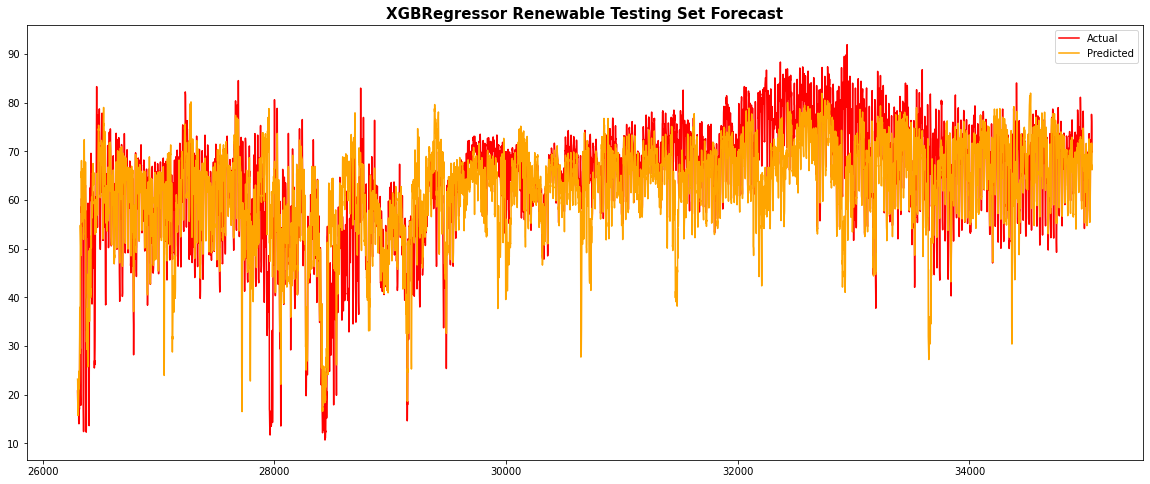

In [84]:
df_plot = pd.DataFrame({'y_test':y_test, 'xgb_pred':rs_model.predict(X_test)})

plt.figure(figsize=(20,8))
df_plot['y_test'].plot(label='Actual',color='red')
df_plot['xgb_pred'].plot(label='Predicted',color = 'orange')
plt.title('XGBRegressor Renewable Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

### XGBRegressor RandomSearch Using OneHotEncoder

In [26]:
# Pipeline variable for RandomSearch - Using OneHotEncoder
rs_onehot_pipe = make_pipeline(OneHotEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_onehot_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0,1,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# RandomSearch Model
rs_onehot_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=20,
                                   n_jobs=1)
rs_onehot_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gbtree',
                                                                  'gblinear',
                                                                  'dart'],
                                        'xgbregressor__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_delta_step': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(5, 35, 5),
   

In [27]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_onehot_model.best_params_))
print("Best cross-validation score: {}".format(rs_onehot_model.best_score_))


Best hyperparams: {'xgbregressor__subsample': 0.7999999999999999, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 2, 'xgbregressor__max_depth': 25, 'xgbregressor__max_delta_step': 0.6000000000000001, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.30000000000000004, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.3413581912611855


In [28]:
# Check XGBRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_onehot_model.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_onehot_model.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_onehot_model.score(X_test, y_test)))

Training MAE: 6.101490708981298
-------------------------------------------------------------------
Validation MAE: 5.7319102083971165
-------------------------------------------------------------------
Test-set R2 score: 0.5114788276007491


In [29]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__subsample,param_xgbregressor__objective,param_xgbregressor__min_child_weight,param_xgbregressor__max_depth,param_xgbregressor__max_delta_step,param_xgbregressor__learning_rate,...,param_xgbregressor__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.501430,3.365584,0.031417,0.003908,0.9,reg:squarederror,8,20,0.9,0.8,...,gbtree,{'xgbregressor__subsample': 0.8999999999999999...,-0.095764,0.639188,-0.070283,0.256796,0.384120,0.222811,0.278546,3
1,1.319655,0.007544,0.009866,0.000246,0.6,reg:squarederror,5,20,0.2,0.9,...,dart,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-10.160611,-5.356865,-5.973866,-9.620218,-16.484189,-9.519150,3.970570,16
2,7.904030,0.070049,0.071038,0.001780,0.7,reg:squarederror,3,10,0.0,0.7,...,gbtree,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-1.338659,0.497121,-0.900831,-0.140222,-0.070734,-0.390665,0.649954,9
3,34.293086,1.650097,0.108826,0.006835,0.7,reg:squarederror,5,15,0.0,0.7,...,dart,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-1.026834,0.506656,-0.791696,-0.063022,0.062357,-0.262508,0.565894,8
4,1.866041,0.172766,0.011455,0.002524,0.6,reg:squarederror,5,10,0.9,0.3,...,dart,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-6.359272,-2.979171,-2.540792,-5.983539,-10.022101,-5.576975,2.701978,14
5,0.861280,0.029124,0.009534,0.001876,0.8,reg:squarederror,2,25,0.6,0.8,...,gblinear,{'xgbregressor__subsample': 0.7999999999999999...,0.310398,0.600082,0.057934,0.331610,0.406766,0.341358,0.174699,1
6,1.175798,0.087867,0.010713,0.001891,0.5,reg:squarederror,5,20,0.5,0.4,...,gbtree,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-9.239196,-4.768655,-5.087206,-8.737607,-14.909734,-8.548480,3.667313,15
7,1.498001,0.112531,0.011038,0.001985,0.5,reg:squarederror,3,30,0.9,0.2,...,dart,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-10.160611,-5.356865,-5.974035,-9.620451,-16.484189,-9.519230,3.970541,17
8,0.723617,0.009576,0.008073,0.000070,0.7,reg:squarederror,8,30,0.3,0.2,...,gblinear,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",0.216553,0.547126,-0.372230,0.265531,0.427093,0.216815,0.317071,4
9,1.647849,0.080684,0.015248,0.004542,0.9,reg:squarederror,2,25,0.8,0.4,...,dart,{'xgbregressor__subsample': 0.8999999999999999...,-4.634084,-1.957461,-1.251677,-4.337566,-7.121968,-3.860551,2.092401,12


## 2) RandomForestRegressor 
+ Random forest is an ensemble learning method used for classification, regression analysis, and operates by outputting classification or average predictions (regression analysis) from a number of decision trees constructed during the training process.

### RandomForestRegressor RandomSearch Using OrdinalEncoder

In [30]:
# Pipeline variable for RandomSearch
rs_pipe2 = make_pipeline(OrdinalEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch
rs_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,200,10),
             'randomforestregressor__max_samples':np.arange(0.2,1,0.1),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(2,5,1)}

# RandomSearch Model
rs_model2 = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=20,
                                  n_jobs=1)

# Model fit
rs_model2.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 200, 

In [31]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_model2.best_params_))
print("Best cross-validation score: {}".format(rs_model2.best_score_))


Best hyperparams: {'randomforestregressor__n_estimators': 145, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__max_samples': 0.2, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.2782547919451356


In [32]:
# Check XGBRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_model2.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_model2.score(X_test, y_test)))

Training MAE: 2.960736999333758
-------------------------------------------------------------------
Validation MAE: 8.230130315499826
-------------------------------------------------------------------
Test-set R2 score: 0.2454112394485326


In [33]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__subsample,param_xgbregressor__objective,param_xgbregressor__min_child_weight,param_xgbregressor__max_depth,param_xgbregressor__max_delta_step,param_xgbregressor__learning_rate,...,param_xgbregressor__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.501430,3.365584,0.031417,0.003908,0.9,reg:squarederror,8,20,0.9,0.8,...,gbtree,{'xgbregressor__subsample': 0.8999999999999999...,-0.095764,0.639188,-0.070283,0.256796,0.384120,0.222811,0.278546,3
1,1.319655,0.007544,0.009866,0.000246,0.6,reg:squarederror,5,20,0.2,0.9,...,dart,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-10.160611,-5.356865,-5.973866,-9.620218,-16.484189,-9.519150,3.970570,16
2,7.904030,0.070049,0.071038,0.001780,0.7,reg:squarederror,3,10,0.0,0.7,...,gbtree,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-1.338659,0.497121,-0.900831,-0.140222,-0.070734,-0.390665,0.649954,9
3,34.293086,1.650097,0.108826,0.006835,0.7,reg:squarederror,5,15,0.0,0.7,...,dart,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-1.026834,0.506656,-0.791696,-0.063022,0.062357,-0.262508,0.565894,8
4,1.866041,0.172766,0.011455,0.002524,0.6,reg:squarederror,5,10,0.9,0.3,...,dart,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-6.359272,-2.979171,-2.540792,-5.983539,-10.022101,-5.576975,2.701978,14
5,0.861280,0.029124,0.009534,0.001876,0.8,reg:squarederror,2,25,0.6,0.8,...,gblinear,{'xgbregressor__subsample': 0.7999999999999999...,0.310398,0.600082,0.057934,0.331610,0.406766,0.341358,0.174699,1
6,1.175798,0.087867,0.010713,0.001891,0.5,reg:squarederror,5,20,0.5,0.4,...,gbtree,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-9.239196,-4.768655,-5.087206,-8.737607,-14.909734,-8.548480,3.667313,15
7,1.498001,0.112531,0.011038,0.001985,0.5,reg:squarederror,3,30,0.9,0.2,...,dart,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-10.160611,-5.356865,-5.974035,-9.620451,-16.484189,-9.519230,3.970541,17
8,0.723617,0.009576,0.008073,0.000070,0.7,reg:squarederror,8,30,0.3,0.2,...,gblinear,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",0.216553,0.547126,-0.372230,0.265531,0.427093,0.216815,0.317071,4
9,1.647849,0.080684,0.015248,0.004542,0.9,reg:squarederror,2,25,0.8,0.4,...,dart,{'xgbregressor__subsample': 0.8999999999999999...,-4.634084,-1.957461,-1.251677,-4.337566,-7.121968,-3.860551,2.092401,12


### RandomForestRegressor RandomSearch Using OneHotEncoder

In [34]:
# Pipeline variable for RandomSearch
rs_onehot_pipe2 = make_pipeline(OneHotEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch
rs_onehot_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,200,10),
             'randomforestregressor__max_samples':np.arange(0.2,1,0.1),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(2,5,1)}

# RandomSearch Model
rs_onehot_model2 = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=20,
                                  n_jobs=1)

# Model fit
rs_onehot_model2.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 200, 

In [35]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_onehot_model2.best_params_))
print("Best cross-validation score: {}".format(rs_onehot_model2.best_score_))

# Check XGBRregressor model metrics
print("============== Check XGBRregressor model metrics============")
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_onehot_model2.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_onehot_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_onehot_model2.score(X_test, y_test)))

Best hyperparams: {'randomforestregressor__n_estimators': 195, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__max_samples': 0.5000000000000001, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 20}
Best cross-validation score: 0.2760115643965351
============== Check XGBRregressor model metrics============
Training MAE: 1.8768133691002797
-------------------------------------------------------------------
Validation MAE: 8.243295613112691
-------------------------------------------------------------------
Test-set R2 score: 0.2315812466650926


In [36]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_split,param_randomforestregressor__max_samples,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.304091,0.011070,0.120493,0.001611,165,2,0.3,sqrt,15,"{'randomforestregressor__n_estimators': 165, '...",-0.066640,0.709169,-0.021676,0.154704,0.558206,0.266753,0.312274,4
1,2.524381,0.022306,0.083912,0.001674,175,4,0.3,log2,10,"{'randomforestregressor__n_estimators': 175, '...",-0.122655,0.675507,-0.127565,0.205549,0.555030,0.237173,0.333671,13
2,1.642189,0.019811,0.063274,0.003628,75,3,0.3,log2,30,"{'randomforestregressor__n_estimators': 75, 'r...",-0.158668,0.709161,-0.058724,0.143854,0.560287,0.239182,0.340619,12
3,1.971584,0.391704,0.096472,0.028770,165,2,0.2,log2,10,"{'randomforestregressor__n_estimators': 165, '...",-0.064254,0.679085,-0.094971,0.167419,0.562283,0.249912,0.318187,10
4,2.327330,0.400558,0.101813,0.003685,145,4,0.2,log2,20,"{'randomforestregressor__n_estimators': 145, '...",-0.073953,0.701173,-0.049545,0.191102,0.543424,0.262440,0.312097,7
5,1.018316,0.003971,0.041604,0.000561,155,4,0.2,sqrt,5,"{'randomforestregressor__n_estimators': 155, '...",0.007938,0.569188,-0.528740,0.085501,0.477272,0.122232,0.390897,17
6,0.635078,0.002004,0.032195,0.004940,95,2,0.2,log2,5,"{'randomforestregressor__n_estimators': 95, 'r...",0.015713,0.571492,-0.537216,0.088732,0.471478,0.122040,0.392721,18
7,3.171756,0.028855,0.063215,0.003036,65,3,0.9,sqrt,20,"{'randomforestregressor__n_estimators': 65, 'r...",-0.132593,0.700196,-0.114382,0.161696,0.568950,0.236773,0.343651,14
8,6.294123,0.054516,0.161276,0.006987,195,3,0.5,log2,20,"{'randomforestregressor__n_estimators': 195, '...",-0.078378,0.712276,0.003223,0.174777,0.568160,0.276012,0.311747,1
9,1.036322,0.007975,0.051539,0.003389,95,2,0.2,sqrt,10,"{'randomforestregressor__n_estimators': 95, 'r...",-0.017122,0.671234,-0.086665,0.147413,0.554914,0.253955,0.305141,8


## 2. fossil_dataset random search

### XGBRegressor RandomSearch Using OrdinalEncoder

In [96]:
# Pipeline variable for RandomSearch - Using OrdinalEncoder
xgb_f_pipe = make_pipeline(OrdinalEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
xgb_f_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0,1,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# RandomSearch Model
xgb_f_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=20,
                                   n_jobs=1)
xgb_f_model.fit(X_train_f, y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gbtree',
                                                                  'gblinear',
                                                                  'dart'],
                                        'xgbregressor__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_delta_step': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(5, 35, 5),
   

In [97]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(xgb_f_model.best_params_))
print("Best cross-validation score: {}".format(xgb_f_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,xgb_f_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,xgb_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(xgb_f_model.score(X_test_f, y_test_f)))

Best hyperparams: {'xgbregressor__subsample': 0.5, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 7, 'xgbregressor__max_depth': 15, 'xgbregressor__max_delta_step': 0.0, 'xgbregressor__learning_rate': 0.6000000000000001, 'xgbregressor__gamma': 0.7000000000000001, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.29338636200136153
Training MAE: 6.598285982725099
-------------------------------------------------------------------
Validation MAE: 5.954674684864458
-------------------------------------------------------------------
Test-set R2 score: 0.49058010854164125


In [98]:
import pandas as pd
results = pd.DataFrame(xgb_f_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__subsample,param_xgbregressor__objective,param_xgbregressor__min_child_weight,param_xgbregressor__max_depth,param_xgbregressor__max_delta_step,param_xgbregressor__learning_rate,...,param_xgbregressor__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.390229,0.066450,0.010153,0.000529,0.7,reg:squarederror,7,25,0.3,0.5,...,dart,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-11.625079,-6.303317,-7.446105,-11.023764,-18.994054,-11.078464,4.448694,17
1,0.695669,0.006357,0.008022,0.000437,0.5,reg:squarederror,4,30,0.6,0.2,...,gblinear,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",0.241856,0.469826,-0.321767,0.192390,0.375849,0.191631,0.274747,7
2,2.540674,0.396298,0.013040,0.001058,0.8,reg:squarederror,1,25,0.8,0.5,...,gbtree,{'xgbregressor__subsample': 0.7999999999999999...,-2.440723,-0.721587,-0.092159,-2.276152,-3.515168,-1.809158,1.237604,13
3,3.408414,0.083151,0.037131,0.000565,0.6,reg:squarederror,6,5,0.0,0.3,...,gbtree,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-0.355635,0.601124,0.105549,-0.020389,0.414296,0.148989,0.334674,9
4,0.699000,0.006768,0.007902,0.000194,0.7,reg:squarederror,8,5,0.1,0.4,...,gblinear,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",0.292973,0.513406,-0.200085,0.246645,0.420258,0.254639,0.246048,2
5,1.181250,0.109346,0.009525,0.000233,0.5,reg:squarederror,8,5,0.7,0.3,...,gbtree,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-8.795925,-4.487380,-4.664958,-8.312157,-14.152953,-8.082674,3.521835,16
6,0.695663,0.008522,0.009082,0.001338,0.5,reg:squarederror,7,15,0.0,0.6,...,gblinear,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",0.325556,0.538247,-0.114175,0.288895,0.428409,0.293386,0.221517,1
7,1.017928,0.102174,0.008822,0.000060,0.6,reg:squarederror,5,10,0.2,0.5,...,gbtree,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-14.284183,-8.051715,-10.260131,-13.575353,-23.572169,-13.948710,5.314942,19
8,1.646812,0.167456,0.010451,0.000404,0.5,reg:squarederror,9,5,0.8,0.3,...,dart,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-7.530239,-3.694833,-3.522677,-7.099888,-11.999036,-6.769335,3.099399,15
9,2.864739,0.313849,0.014951,0.001100,0.5,reg:squarederror,1,10,0.7,0.7,...,gbtree,"{'xgbregressor__subsample': 0.5, 'xgbregressor...",-0.827593,0.111849,0.104362,-0.784574,-0.962907,-0.471773,0.477119,11


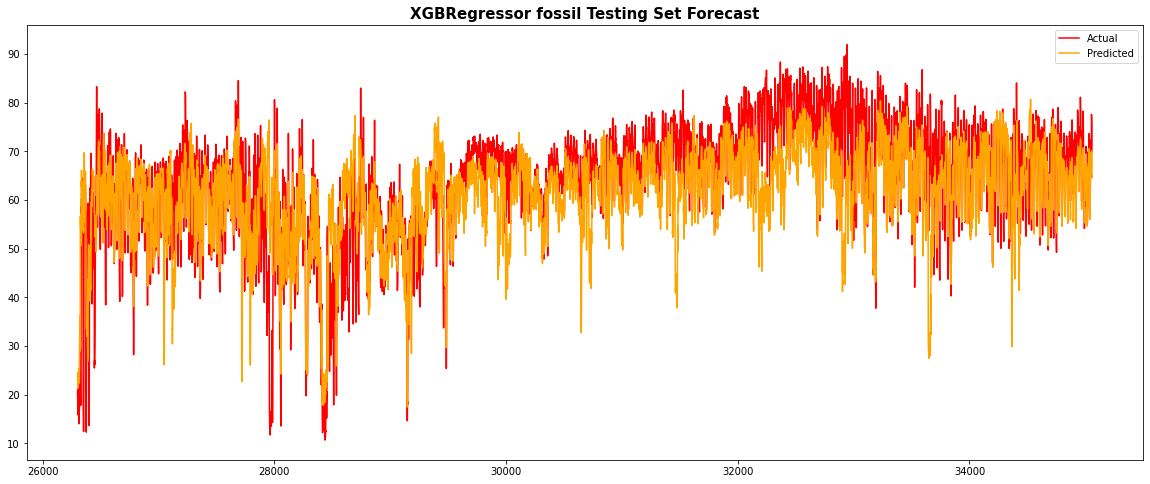

In [109]:
df_plot = pd.DataFrame({'y_test':y_test_f, 'rs_pred':xgb_f_model.predict(X_test_f)})

plt.figure(figsize=(20,8))

df_plot['y_test'].plot(label='Actual',color='red')
df_plot['rs_pred'].plot(label='Predicted',color = 'orange')
plt.title('XGBRegressor fossil Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

### XGBRegressor RandomSearch Using OneHotEncoder

In [99]:
# Pipeline variable for RandomSearch - Using Onehotencoder
xgb_f_o_pipe = make_pipeline(OneHotEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
xgb_f_param_o_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0,1,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# RandomSearch Model
xgb_f_o_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=20,
                                   n_jobs=1)
xgb_f_o_model.fit(X_train_f, y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gbtree',
                                                                  'gblinear',
                                                                  'dart'],
                                        'xgbregressor__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_delta_step': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(5, 35, 5),
   

In [100]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(xgb_f_o_model.best_params_))
print("Best cross-validation score: {}".format(xgb_f_o_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,xgb_f_o_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,xgb_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(xgb_f_o_model.score(X_test_f, y_test_f)))

Best hyperparams: {'xgbregressor__subsample': 0.8999999999999999, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 8, 'xgbregressor__max_depth': 5, 'xgbregressor__max_delta_step': 0.9, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.8, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.31437676033663553
Training MAE: 6.479969455209469
-------------------------------------------------------------------
Validation MAE: 5.6462464932571175
-------------------------------------------------------------------
Test-set R2 score: 0.5084410141176884


In [101]:
import pandas as pd
results = pd.DataFrame(xgb_f_o_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__subsample,param_xgbregressor__objective,param_xgbregressor__min_child_weight,param_xgbregressor__max_depth,param_xgbregressor__max_delta_step,param_xgbregressor__learning_rate,...,param_xgbregressor__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.701705,0.005342,0.008033,0.000218,0.9,reg:squarederror,2,5,0.1,0.7,...,gblinear,{'xgbregressor__subsample': 0.8999999999999999...,0.333986,0.545404,-0.083473,0.303770,0.428238,0.305585,0.212006,2
1,1.255872,0.006247,0.009879,0.000471,0.8,reg:squarederror,7,10,0.2,0.5,...,dart,{'xgbregressor__subsample': 0.7999999999999999...,-14.284183,-8.051715,-10.260131,-13.575353,-23.572169,-13.948710,5.314942,16
2,1.317573,0.075746,0.010567,0.001765,0.7,reg:squarederror,6,25,0.3,0.4,...,dart,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-13.187640,-7.326708,-9.080473,-12.522874,-21.681669,-12.759873,4.957719,15
3,2.142981,0.341414,0.012981,0.002565,0.9,reg:squarederror,8,15,0.7,0.5,...,dart,{'xgbregressor__subsample': 0.8999999999999999...,-3.732018,-1.437332,-0.706237,-3.474458,-5.622186,-2.994446,1.751568,11
4,0.963892,0.009879,0.009634,0.001640,0.6,reg:squarederror,6,15,0.1,0.7,...,gbtree,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-16.011147,-9.203353,-12.164663,-15.233694,-26.556077,-15.833787,5.878507,17
5,2.693806,0.373199,0.012930,0.000751,0.9,reg:squarederror,8,30,0.9,0.5,...,dart,{'xgbregressor__subsample': 0.8999999999999999...,-1.434906,-0.195178,0.149169,-1.356279,-1.898926,-0.947224,0.784672,7
6,3.978126,0.529967,0.016256,0.000850,0.7,reg:squarederror,7,15,0.8,0.7,...,dart,"{'xgbregressor__subsample': 0.7, 'xgbregressor...",-0.304415,0.461509,-0.002679,-0.151959,-0.003921,-0.000293,0.256426,5
7,3.492027,0.414845,0.015317,0.004202,0.6,reg:squarederror,2,30,0.6,0.7,...,dart,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-1.998413,-0.493395,0.038747,-1.866043,-2.810297,-1.425880,1.044300,8
8,0.703535,0.005777,0.008008,0.000253,0.6,reg:squarederror,9,30,0.1,0.5,...,gblinear,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",0.312164,0.527774,-0.152572,0.269958,0.426701,0.276805,0.232859,4
9,0.990995,0.017272,0.009956,0.001662,0.6,reg:squarederror,2,30,0.6,0.2,...,gbtree,"{'xgbregressor__subsample': 0.6, 'xgbregressor...",-13.187627,-7.326708,-9.080473,-12.522874,-21.681669,-12.759870,4.957718,14


### RandomForestRegressor RandomSearch Using OrdinalEncoder

In [102]:
# Pipeline variable for RandomSearch
rf_f_pipe = make_pipeline(OrdinalEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch
rf_f_param_grid = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,200,10),
             'randomforestregressor__max_samples':np.arange(0.2,1,0.1),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(2,5,1)}

# RandomSearch Model
rf_f_model = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=20,
                                  n_jobs=1)

# Model fit
rf_f_model.fit(X_train_f,y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 200, 

In [103]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rf_f_model.best_params_))
print("Best cross-validation score: {}".format(rf_f_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,rf_f_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,rf_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rf_f_model.score(X_test_f, y_test_f)))

Best hyperparams: {'randomforestregressor__n_estimators': 45, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__max_samples': 0.7000000000000002, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.3019470005178485
Training MAE: 1.4092696888876934
-------------------------------------------------------------------
Validation MAE: 8.165194244804994
-------------------------------------------------------------------
Test-set R2 score: 0.2410010172679955


### RandomForestRegressor RandomSearch Using OneHotEncoder

In [104]:
# Pipeline variable for RandomSearch
rf_f_o_pipe = make_pipeline(OneHotEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch
rf_f_o_param_grid = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,200,10),
             'randomforestregressor__max_samples':np.arange(0.2,1,0.1),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(2,5,1)}

# RandomSearch Model
rf_f_o_model = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=20,
                                  n_jobs=1)

# Model fit
rf_f_o_model.fit(X_train_f,y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 200, 

In [105]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rf_f_o_model.best_params_))
print("Best cross-validation score: {}".format(rf_f_o_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,rf_f_o_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,rf_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rf_f_o_model.score(X_test_f, y_test_f)))

Best hyperparams: {'randomforestregressor__n_estimators': 135, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__max_samples': 0.30000000000000004, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.2977541051984246
Training MAE: 2.365797318802455
-------------------------------------------------------------------
Validation MAE: 8.14863592106554
-------------------------------------------------------------------
Test-set R2 score: 0.24871272298571234


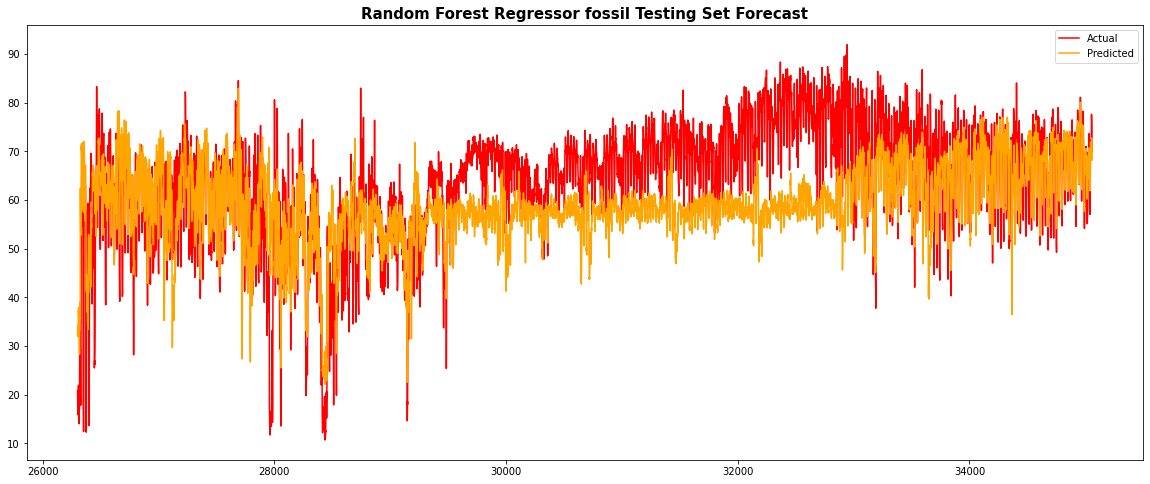

In [106]:
df_plot = pd.DataFrame({'y_test':y_test_f, 'rs_pred':rf_f_o_model.predict(X_test_f)})

plt.figure(figsize=(20,8))

df_plot['y_test'].plot(label='Actual',color='red')
df_plot['rs_pred'].plot(label='Predicted',color = 'orange')
plt.title('Random Forest Regressor fossil Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

# Visualization

In [47]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


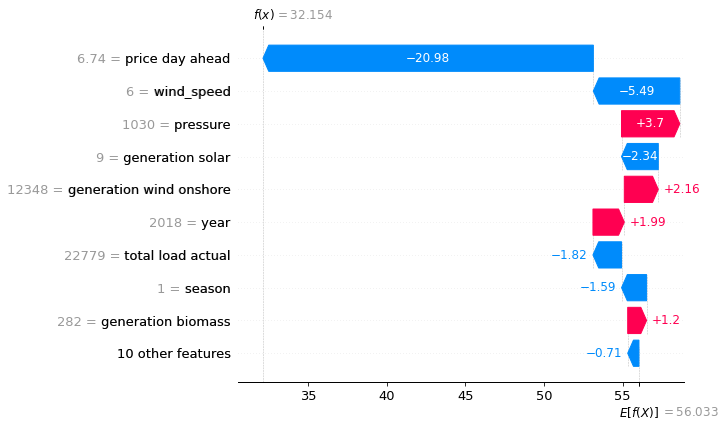

In [117]:
import shap
#Set samp variable to show features when plotting 
samp = pd.DataFrame(XT_val,columns=ordinal_fit.get_feature_names())
# Shap waterfall plot showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values=explainer(samp.head(1))
shap.plots.waterfall(shap_values[0])

In [118]:
# Shap force plot also showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values = explainer.shap_values(samp.head(1))
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values=shap_values,
                features=samp.head(1))

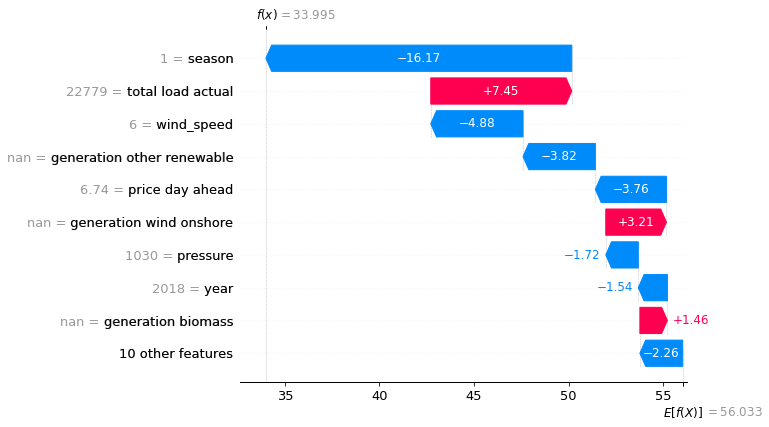

In [119]:
import shap
# Set samp variable to show features by a plot 
samp = pd.DataFrame(XT_val_f,columns=ordinal_fit.get_feature_names())
# Feature importance
explainer = shap.TreeExplainer(model_xgbr_f)
shap_values=explainer(samp.head(1))
shap.plots.waterfall(shap_values[0])

In [120]:
# Shap force plot also showing feature importance
explainer = shap.TreeExplainer(model_xgbr_f)
shap_values = explainer.shap_values(samp.head(1))
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values=shap_values,
                features=samp.head(1))